![image](./images/pandas.png)

Pandas est le package de prédilection pour traiter des données structurées.

Pandas est basé sur 2 structures extrêmement liées les Series et le DataFrame.

Ces deux structures permettent de traiter des données sous forme de tableaux indexés.

Les classes de Pandas utilisent des classes de Numpy, il est donc possible d'utiliser les fonctions universelles de Numpy sur les objets Pandas.

In [1]:
# on importe pandas avec :
import pandas as pd
import numpy as np
%matplotlib inline

# Les Series de Pandas

- Les Series sont indexées, c'est leur avantage sur les arrays de NumPy
- On peut utiliser les fonctions `.values` et `.index` pour voir les différentes parties de chaque Series
- On définit une Series par `pd.Series([,], index=['','',])`
- On peut appeler un élément avec `ma_serie['France']`
- On peut aussi faire des conditions :
```python
ma_serie[ma_serie>5000000]
```
```
'France' in ma_serie
```
- Les objets Series peuvent être transformés en dictionnaires en utilisant :
`.to_dict()`

**Exercice :**
    
Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [2]:
serie_academies = pd.Series([100,50,30,80], 
                            index = ["Paris", "Toulouse", 
                                     "Reims", "Aix-Marseille"])

In [3]:
serie_academies

Paris            100
Toulouse          50
Reims             30
Aix-Marseille     80
dtype: int64

In [4]:
serie_academies[["Paris","Reims"]]

Paris    100
Reims     30
dtype: int64

In [5]:
serie_academies.iloc[0:3]

Paris       100
Toulouse     50
Reims        30
dtype: int64

In [6]:
serie_academies[serie_academies>50]

Paris            100
Aix-Marseille     80
dtype: int64

# D'autres opérations sur les objets series

- Pour définir le nom de la Series, on utilise `.name`
- Pour définir le titre de la colonne des observations, on utilise `.index.name`

**Exercice :**
    
Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [7]:
serie_academies.name = "Effectifs personnels"
serie_academies.index.name = "Académie"

In [8]:
serie_academies

Académie
Paris            100
Toulouse          50
Reims             30
Aix-Marseille     80
Name: Effectifs personnels, dtype: int64

# Les données manquantes

Dans pandas, les données manquantes sont identifiés avec les fonctions de Numpy (`np.nan`). On a d'autres fonctions telles que :

In [9]:
pd.isna(pd.Series([2,np.nan,4],index=['a','b','c']))

a    False
b     True
c    False
dtype: bool

In [10]:
pd.notna(pd.Series([2,np.nan,4],index=['a','b','c']))

a     True
b    False
c     True
dtype: bool

In [11]:
serie_academies2 = pd.Series([100,np.nan,30,80], 
                            index = ["Paris", "Toulouse", 
                                     "Reims", "Aix-Marseille"])

In [12]:
serie_academies2

Paris            100.0
Toulouse           NaN
Reims             30.0
Aix-Marseille     80.0
dtype: float64

In [13]:
serie_academies2.mean()

70.0

# Les dates avec pandas

- Python possède un module datetime qui permet de gérer facilement des dates
- Pandas permet d'appliquer les opérations sur les dates aux Series et aux DataFrame
- Le format des dates Python est `YYYY-MM-DD HH:MM:SS`

- On peut générer des dates avec la fonction `pd.date_range()` avec différente fréquences `freq=`
- On peut utiliser ces dates comme index dans un DataFrame ou dans un objet Series
- On peut changer la fréquence en utilisant `.asfreq()`
- Pour transformer une chaine de caractère en date, on utilise `pd.to_datetime()` avec l’option `dayfirst=True` si on est dans le cas français
-On pourra aussi spécifier un format pour accélérer le processus `%Y%m%d`

In [14]:
import datetime

In [15]:
datetime.datetime.today()

datetime.datetime(2019, 7, 1, 12, 39, 35, 120793)

In [16]:
pd.datetime.isocalendar(datetime.datetime.today())

(2019, 27, 1)

**Exercice :**

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui. Afficher le résultat dans un graphique (on utilisera la méthode `.plot()`

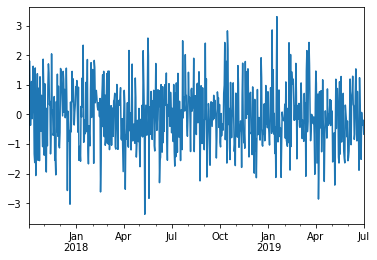

In [17]:
dates= pd.date_range(start="2017-10-3", 
                     end=pd.datetime.today(),
                     freq ="D")
serie_val = pd.Series(np.random.randn(len(dates)), index = dates)
serie_val.plot()

# Aller plus loin avec les dates

- On peut définir avec pandas des fuseaux horaires
    - On utilise `.tz_localize("Europe/Paris")`
    - On peut changer de fuseau horaire avec `.tz_convert()`

- On peut aussi travailler sur des périodes plutôt que sur des dates
    - On utilise `pd.period_range()`


# Le DataFrame 

- Les DataFrame sont des objets très souples pouvant être construits de différentes façon
- On peut les construire en récupérant des données copier / coller, où directement sur Internet, ou en entrant les valeurs manuellement


- Les DataFrame se rapprochent des dictionnaires et on peut construire ces objets en utilisant `DataFrame(dico)`
- De nombreux détails sur la création des DataFrame se trouve sur ce site :

<http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html>


# Construction de DataFrame

On peut simplement construire un DataFrame avec le classe pd.DataFrame() à partir de différentes structures :

In [18]:
ncol = 10
nrow = 20
frame1=pd.DataFrame(np.random.randn(nrow*ncol).reshape(nrow,ncol),
             index=["obs_"+str(i) for i in range(nrow)],
             columns=["col_"+str(i) for i in range(ncol)])
frame1

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
obs_0,1.772328,0.641590,0.109899,0.312759,0.123305,1.690762,1.820785,1.052496,-0.060897,-1.518362
obs_1,-0.607104,-0.884068,-0.128052,-1.429348,-2.110785,0.237778,0.317246,0.856621,2.850860,-0.656317
obs_2,-0.352885,-0.343569,-1.458959,-0.806380,-0.614345,1.455234,-0.472732,-0.206300,-0.177464,1.177034
obs_3,-1.509813,-1.150440,-0.467401,0.917903,-0.390482,0.500425,1.315247,0.061265,-0.898741,1.031943
obs_4,1.123442,-0.564098,0.378088,-0.149633,0.983827,1.126736,-0.265794,0.202155,-1.110273,0.379988
obs_5,0.356552,-1.459447,0.416051,-0.239222,0.656080,1.453480,-1.513198,-1.197956,-1.422939,1.308575
obs_6,0.572447,-0.281379,-0.924961,0.737557,-0.192669,1.085990,1.162261,-1.268394,-0.188595,0.199188
obs_7,-1.158064,0.123241,1.057401,0.707134,0.274303,0.089414,-0.634888,-0.294090,-0.433970,-0.783495
obs_8,-1.060339,0.169224,-0.257909,0.196447,-0.129782,0.697188,-0.519547,0.644285,1.421035,-0.233777
obs_9,-2.146503,0.719951,0.408791,-1.543082,1.086296,-2.400742,-0.141954,1.554624,-0.590479,1.340916


In [19]:
# on récupère les données agents
agents = pd.read_csv("./data/Agents.csv",sep=";",index_col = "Clef")

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
agents.head()

,etab,nature,sexe,annais,age,grade,angrade,echelon,geostat4,acad,ETAB_RAT
Clef,,,,,,,,,,,
F2lnacdarwP3HCF,0010001W,320,1.0,1965.0,50.0,5311.0,1996.0,10.0,11110,LYON,NaN
Gg3Ud2SPdY8Gdm9,0010001W,320,2.0,1956.0,59.0,6152.0,2013.0,6.0,11110,LYON,NaN
qdQLaHGhQNdKtox,0010001W,320,1.0,1959.0,56.0,5754.0,2006.0,8.0,11110,LYON,NaN
ff41lvlgjXzK9Cv,0010001W,320,2.0,1976.0,39.0,5754.0,2001.0,8.0,11110,LYON,NaN
6V7vA8L3DeI13SN,0010001W,320,2.0,1973.0,42.0,5512.0,2004.0,9.0,11110,LYON,NaN


In [21]:
agents.shape

(361231, 11)

In [22]:
agents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361231 entries, F2lnacdarwP3HCF to xZVZT0MTzmydpkA
Data columns (total 11 columns):
etab        361231 non-null object
nature      361231 non-null int64
sexe        360435 non-null float64
annais      360445 non-null float64
age         360445 non-null float64
grade       360445 non-null float64
angrade     360445 non-null float64
echelon     358288 non-null float64
geostat4    361231 non-null int64
acad        361231 non-null object
ETAB_RAT    156 non-null object
dtypes: float64(6), int64(2), object(3)
memory usage: 33.1+ MB


In [23]:
# extraire une colonne :
agents["age"]

Clef
F2lnacdarwP3HCF    50.0
Gg3Ud2SPdY8Gdm9    59.0
qdQLaHGhQNdKtox    56.0
ff41lvlgjXzK9Cv    39.0
6V7vA8L3DeI13SN    42.0
NKe8xL9PJsiwXT1    32.0
YIDemSS0SnRTdbf    37.0
Rl3ufCD9AS1qWft    33.0
LJCYN2oejRZCkLG    43.0
Yte29Zd9X4LMYf2    43.0
cj44lLw2Tr48bpj    42.0
2Z217lwYvpPjnPY    38.0
GL5D4ymufuxW0Jn    36.0
iwEdvJ1iD9fho2F    27.0
FgVoZ1n6OO9jqP3    52.0
ycdtb1VDOOPARHs    41.0
EOulXFm4RLv8Tej    49.0
i8KZbtNC9aAMOvV    47.0
navbkTrj6yjXefv    46.0
uXgQG4gKIGOB6L8    35.0
5TjDCZrFSbjQTZD    49.0
hgmiutMn7PsBmTA    52.0
d4jjubLUqJthRrJ    32.0
ionbMnmbUzKadKA    61.0
6pbq3VHEwgg0xuM    54.0
NCsFHiCBjBuWLht    30.0
zLiNadppSufQfCV    44.0
PwOgD8MoZThB5aQ    49.0
S1LBHVWV4Npcm3V    23.0
7XYDXQVeykFyPeC    27.0
                   ... 
TvvoliDpVBv3Pkk    26.0
1YMLTCy1BFn9xT0    50.0
FbjXFHLWwBA5vIF    50.0
vAcKxX3sKcK2ZjS    29.0
YZLSWSvhWjTB8al    25.0
lsH52cyjjutEyrh    31.0
DAZALPFzCFMvP4i    24.0
idjkaTaCkBagmjD    56.0
D16PAQMLUJP9xCc    29.0
a60AEWbwo2VXYb4    34.0
liz1kbZHx5W

In [24]:
# extraire les 3 premières lignes de deux colonnes
agents[["sexe","age"]].head(3)

,sexe,age
Clef,,
F2lnacdarwP3HCF,1.0,50.0
Gg3Ud2SPdY8Gdm9,2.0,59.0
qdQLaHGhQNdKtox,1.0,56.0


In [25]:
def affichage_type_col(frame):
    """ Cette fonction affiche le nom des colonnes
    avec une phrase"""
    
    for col in frame.columns:
        print("Le type de la colonne {} est {}".format(col,
                                                   frame[col].dtype))

In [26]:
affichage_type_col(agents)

Le type de la colonne etab est object
Le type de la colonne nature est int64
Le type de la colonne sexe est float64
Le type de la colonne annais est float64
Le type de la colonne age est float64
Le type de la colonne grade est float64
Le type de la colonne angrade est float64
Le type de la colonne echelon est float64
Le type de la colonne geostat4 est int64
Le type de la colonne acad est object
Le type de la colonne ETAB_RAT est object


In [27]:
# on cherche les agents de plus de 65 ans :
agents[agents["age"]>65]

,etab,nature,sexe,annais,age,grade,angrade,echelon,geostat4,acad,ETAB_RAT
Clef,,,,,,,,,,,
NY6ExfAnrWBeMHT,0010005A,340,2.0,1949.0,66.0,5531.0,1994.0,10.0,11110,LYON,NaN
p0WZMHSkng6iy6J,0020032Z,300,1.0,1949.0,66.0,5532.0,2002.0,7.0,11120,AMIENS,NaN
ZBwJGxMLGYE0tTZ,0021492L,340,1.0,1949.0,66.0,5531.0,2002.0,10.0,11120,AMIENS,NaN
qpziRVbmfjSRgo0,0050004C,310,2.0,1948.0,67.0,5532.0,2012.0,6.0,11102,AIX-MARSEILLE,NaN
8zXrCUZNYCojKdq,0060033D,306,2.0,1947.0,68.0,5512.0,1998.0,10.0,11123,NICE,NaN
VKBTWYDmOEylNnW,0061478Z,306,2.0,1949.0,66.0,5532.0,2013.0,5.0,11123,NICE,NaN
STeIkt5S80gejN4,0080028M,320,2.0,1948.0,67.0,5755.0,2013.0,5.0,11119,REIMS,NaN
AHP3Z42tMq2MPn6,0081100C,340,2.0,1949.0,66.0,5532.0,2014.0,5.0,11119,REIMS,NaN
05DJluYzmvT1fN2,0100807Y,340,1.0,1949.0,66.0,5532.0,2009.0,7.0,11119,REIMS,NaN


In [28]:
# on extrait un agent spécifique
agents.loc["qdQLaHGhQNdKtox"]

etab        0010001W
nature           320
sexe               1
annais          1959
age               56
grade           5754
angrade         2006
echelon            8
geostat4       11110
acad            LYON
ETAB_RAT         NaN
Name: qdQLaHGhQNdKtox, dtype: object

# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [29]:
print(frame1.columns)

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9'],
      dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


# Options de visualisation et de résumé

Pour afficher les 3 premières lignes, on peut utiliser :


In [30]:
frame1.head(3)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
obs_0,1.772328,0.641590,0.109899,0.312759,0.123305,1.690762,1.820785,1.052496,-0.060897,-1.518362
obs_1,-0.607104,-0.884068,-0.128052,-1.429348,-2.110785,0.237778,0.317246,0.856621,2.850860,-0.656317
obs_2,-0.352885,-0.343569,-1.458959,-0.806380,-0.614345,1.455234,-0.472732,-0.206300,-0.177464,1.177034


Pour afficher un résumé du DF :

In [31]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, obs_0 to obs_19
Data columns (total 10 columns):
col_0    20 non-null float64
col_1    20 non-null float64
col_2    20 non-null float64
col_3    20 non-null float64
col_4    20 non-null float64
col_5    20 non-null float64
col_6    20 non-null float64
col_7    20 non-null float64
col_8    20 non-null float64
col_9    20 non-null float64
dtypes: float64(10)
memory usage: 1.7+ KB


# Importer des données externes

Pandas est l'outil le plus efficace pour importer des données externes, il prend en charge de nombreux formats dont csv, Excel, SQL, SAS...


## Importation de données avec Pandas

Quel que soit le type de fichier, Pandas possède une fonction :
```python
frame=pd.read_...('chemin_du_fichier/nom_du_fichier',...)
```
Pour écrire un DataFrame dans un fichier, on utilise :
```python
frame.to_...('chemin_du_fichier/nom_du_fichier',...)
```

**Exercice :**
    
Importer un fichier `.csv` avec `pd.read_csv()`. On utilisera le fichier "./data/airbnb.csv"

In [32]:
airbnb = pd.read_csv("https://www.stat4decision.com/airbnb.csv")

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Exercice :**

Importer les données communes.txt

In [33]:
communes = pd.read_csv("./data/Communes.txt",sep="|")

In [34]:
communes.head()

,commune,libelle_commune,departement_insee_3
0,$,NON RENSEIGNE,$
1,-,SANS OBJET,-
2,01001,L'ABERGEMENT-CLEMENCIAT,001
3,01002,L'ABERGEMENT-DE-VAREY,001
4,01003,AMAREINS,001


In [35]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59126 entries, 0 to 59125
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 47.8+ MB


# D'autres types de données

## JSON
Les objets JSON ressemblent à des dictionnaires.

On utilise le module `json` puis la fonction `json.loads()` pour transformer une entrée JSON en objet json

Si le fichier a un format `json` bien construit on peut utiliser `pd.read_json()`

## HTML
On utilise `pd.read_html(url)`. Cet fonction est basée sur les packages `beautifulsoup` et `html5lib`

Cette fonction renvoie une liste de DataFrame qui représentent tous les DataFrame de la page. On ira ensuite chercher l'élément qui nous intéresse avec `frame_list[0]`

**Exercice :**
    
Importez un tableau en html depuis la page <http://www.fdic.gov/bank/individual/failed/banklist.html>

In [36]:
bank = pd.read_html("http://www.fdic.gov/bank/individual/failed/banklist.html")

In [37]:
print(type(bank),len(bank))

<class 'list'> 1


In [38]:
frame_bank = bank[0]

In [39]:
frame_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 7 columns):
Bank Name                556 non-null object
City                     556 non-null object
ST                       556 non-null object
CERT                     556 non-null int64
Acquiring Institution    556 non-null object
Closing Date             556 non-null object
Updated Date             556 non-null object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


**Exercice :**
Importer les données Service.json

In [40]:
service = pd.read_json("./data/Service.json")

In [41]:
service.shape

(361231, 16)

In [42]:
service.head()

,Clef,discip,disrecru,h_faites,h_horens,h_reduc,heurant,heurens,heurloc,heurpond,heurpond_retenues,heursup,modalite,quotite,serv_th,servimax
0,F2lnacdarwP3HCF,L1900,1900E,21.0,3.0,NaN,0,18.0,0,0.0,0.0,1.0,TC,100.0,20.0,20.0
1,Gg3Ud2SPdY8Gdm9,C0072,0072R,23.0,0.0,NaN,0,23.0,0,0.0,0.0,2.0,TC,100.0,21.0,21.0
2,qdQLaHGhQNdKtox,P5200,5200J,19.0,1.0,NaN,0,18.0,0,0.0,0.0,1.0,TC,100.0,18.0,18.0
3,ff41lvlgjXzK9Cv,P0210,0210J,14.9,0.0,NaN,0,14.9,0,-0.5,-0.5,NaN,MF,80.0,14.4,18.0
4,6V7vA8L3DeI13SN,L1900,1900A,18.0,3.0,NaN,0,15.0,0,0.0,0.0,1.0,TC,100.0,17.0,17.0


In [43]:
service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361231 entries, 0 to 361230
Data columns (total 16 columns):
Clef                 361231 non-null object
discip               361231 non-null object
disrecru             361231 non-null object
h_faites             361231 non-null float64
h_horens             361231 non-null float64
h_reduc              21982 non-null float64
heurant              361231 non-null int64
heurens              361231 non-null float64
heurloc              361231 non-null int64
heurpond             361182 non-null float64
heurpond_retenues    361231 non-null float64
heursup              237337 non-null float64
modalite             361231 non-null object
quotite              361231 non-null float64
serv_th              361231 non-null float64
servimax             361231 non-null float64
dtypes: float64(10), int64(2), object(4)
memory usage: 44.1+ MB


# Importer depuis Excel

On a deux approches pour Excel :
- On peut utiliser `pd.read_excel()`
- On peut utiliser la classe `pd.ExcelFile()`

Dans ce cas, on utilise :
```python
xlsfile=pd.ExcelFile('fichier.xlsx')
xlsfile.parse('Sheet1')
```

In [44]:
credit = pd.read_excel("./data/credit2.xlsx")

In [45]:
credit.head()

,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner,Customer_ID
0,40,F,S,11,6,37,56,37073,F,5409
1,47,M,M,13,13,30,56,50721,F,5477
2,35,F,U,1,9,33,57,43578,T,5507
3,45,M,U,15,7,30,62,69553,F,8
4,13,F,S,0,7,27,64,37502,T,158


**Exercice :** 
    
Importez un fichier Excel avec les deux approches, on utilisera : `credit2.xlsx` et `ville.xls`

In [46]:
classeur_ville = pd.ExcelFile("./data/ville.xls")

In [47]:
#list_ain = [nom for nom in classeur_ville.sheet_names if "ain" in nom]

In [48]:
ville = classeur_ville.parse(classeur_ville.sheet_names[0])

In [49]:
ville.head()

,NomVille,MAJ,Code Postal,Code INSEE,Code Région,Latitude,Longitude,Eloignement
0,Saint-Denis-lès-Bourg,SAINT DENIS LES BOURG,1000,1344,82,46.200000,5.200000,1
1,Bourg-en-Bresse,BOURG EN BRESSE,1000,1053,82,46.200000,5.216667,1
2,Lurcy,LURCY,1090,1225,82,46.066667,4.766667,1.97
3,Montmerle-sur-Saône,MONTMERLE SUR SAONE,1090,1263,82,46.083333,4.766667,1.97
4,Genouilleux,GENOUILLEUX,1090,1169,82,46.116667,4.783333,1.91


In [50]:
ville.columns

Index(['NomVille', 'MAJ   ', ' Code Postal ', ' Code INSEE ', 'Code Région',
       ' Latitude ', ' Longitude ', ' Eloignement '],
      dtype='object')

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

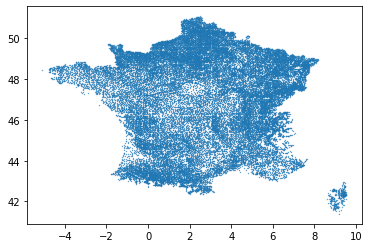

In [52]:
plt.scatter(' Longitude ',' Latitude ', data=ville,s =0.1)
plt.savefig("France.jpg")

# Importer des données SQL

Pandas possède une fonction `read_sql()` qui permet d’importer directement des bases de données ou des queries dans des DataFrame

Il faut tout de même un connecteur pour accéder aux bases de données

Pour mettre en place ce connecteur, on utlise le package SQLAlchemy.

Suivant le type de base de données, on utilisera différents codes mais la structure du code est toujours la même

In [53]:
# on importe l'outil de connexion
from sqlalchemy import create_engine

On crée une connexion
```python
connexion=create_engine("sqlite:///(...).sqlite")
```

On utlise une des fonctions de Pandas pour charger les données
```python
requete="""select ... from ..."""
frame_sql=pd.read_sql_query(requete,connexion)
```

**Exercices :**
    
Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 

In [54]:
connexion=create_engine("sqlite:///./data/Salaries.sqlite")

In [55]:
connexion.table_names()

['Salaries']

In [56]:
salaries = pd.read_sql_query("select * from Salaries", connexion)

In [57]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


## Importer depuis SAS

Si vous avez des données venant de SAS, vous pouvez bien entendu les exporter en csv... mais pandas possède une fonction `pd.read_sas()`

Attention le format d'encodage pourra être important, on utilise généralement  `iso-8859-1`

**Exercice :**
    
Récupérer le fichier bce_uai dans un dataframe

In [58]:
bce_uai = pd.read_sas("./data/bce_uai.sas7bdat",encoding="iso-8859-1")

In [59]:
bce_uai.head()

,CONTRAT_ETABLISSEMENT,CATEGORIE_JURIDIQUE,ETAT_ETABLISSEMENT,MINISTERE_TUTELLE,NUMERO_UAI,SIGLE_UAI,SECTEUR_PUBLIC_PRIVE,NATURE_UAI,COMMUNE,DATE_OUVERTURE,DATE_FERMETURE,DENOMINATION_PRINCIPALE_UAI,PATRONYME_UAI,NIVEAU_UAI,SECTEUR_CONTRAT
0,99,131,1,06,0010670Y,E.P.PU,PU,151,01001,1966-09-30,NaT,ECOLE PRIMAIRE PUBLIQUE,NaN,1,01
1,30,999,1,06,0010093W,E.P.PR,PR,151,01004,1971-03-12,NaT,ECOLE PRIMAIRE PRIVEE,STE MARIE,1,03
2,99,131,1,06,0011207G,E.E.PU,PU,151,01004,1984-09-01,NaT,ECOLE ELEMENTAIRE PUBLIQUE,JULES FERRY,1,01
3,99,200,1,06,0010001W,LP LYC METIER,PU,320,01004,1965-05-01,NaT,LP LYCEE DES METIERS,ALEXANDRE BERARD,1,01
4,99,131,1,06,0010445D,E.M.PU,PU,101,01004,1966-10-07,NaT,ECOLE MATERNELLE PUBLIQUE,JEAN JAURES,1,01


In [60]:
# on extrait les Patronyme les plus utilisés
bce_uai["PATRONYME_UAI"].value_counts()

JULES FERRY                      499
JACQUES PREVERT                  370
JEAN MOULIN                      362
SAINT JOSEPH                     350
JEAN JAURES                      319
NOTRE DAME                       315
VICTOR HUGO                      286
.                                255
ST JOSEPH                        253
JEAN DE LA FONTAINE              217
CENTRE                           210
R.P.I.                           208
JULES VERNE                      200
PAUL LANGEVIN                    194
MARCEL PAGNOL                    193
JEANNE D'ARC                     187
LOUIS PASTEUR                    177
JEAN MACE                        172
LOUISE MICHEL                    165
SAINTE MARIE                     164
SACRE COEUR                      159
ETS                              154
PAUL BERT                        148
MARIE CURIE                      146
ANATOLE FRANCE                   144
INTERCOMMUNALE                   140
ALBERT CAMUS                     138
F

In [61]:
bce_uai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67441 entries, 0 to 67440
Data columns (total 15 columns):
CONTRAT_ETABLISSEMENT          67441 non-null object
CATEGORIE_JURIDIQUE            67441 non-null object
ETAT_ETABLISSEMENT             67441 non-null object
MINISTERE_TUTELLE              67441 non-null object
NUMERO_UAI                     67441 non-null object
SIGLE_UAI                      67426 non-null object
SECTEUR_PUBLIC_PRIVE           67441 non-null object
NATURE_UAI                     67441 non-null object
COMMUNE                        67441 non-null object
DATE_OUVERTURE                 67441 non-null datetime64[ns]
DATE_FERMETURE                 94 non-null datetime64[ns]
DENOMINATION_PRINCIPALE_UAI    67437 non-null object
PATRONYME_UAI                  54200 non-null object
NIVEAU_UAI                     67441 non-null object
SECTEUR_CONTRAT                67441 non-null object
dtypes: datetime64[ns](2), object(13)
memory usage: 7.7+ MB


In [62]:
# on crée une colonne indiquant le jour de la semaine auquel l'établissement a ouvert
bce_uai["jour_ouverture"]=bce_uai["DATE_OUVERTURE"].dt.day_name()

In [63]:
bce_uai["jour_ouverture"].value_counts()

Monday       11782
Saturday     11011
Wednesday    10867
Tuesday      10688
Friday       10529
Thursday      9913
Sunday        2651
Name: jour_ouverture, dtype: int64

In [64]:
# on affiche les années d'ouvertures des établissements
bce_uai["DATE_OUVERTURE"].dt.year.value_counts().head(10)

1965    13020
1967     5752
1966     5618
1971     4875
1970     4305
1968     3990
1969     3203
1972     2082
1973     1693
1977     1687
Name: DATE_OUVERTURE, dtype: int64

In [65]:
# on remplace une valeur au sein d'une chaîne de caractères
bce_uai["DENOMINATION_PRINCIPALE_UAI"].str.replace("PRIMAIRE PUBLIQUE",
                                               "b").str.lower()

0                               ecole b
1                 ecole primaire privee
2            ecole elementaire publique
3                  lp lycee des metiers
4             ecole maternelle publique
5            ecole elementaire publique
6                              ecole  b
7        lycee general et technologique
8             ecole maternelle publique
9             ecole maternelle publique
10                              college
11                        college prive
12                              ecole b
13           ecole elementaire publique
14            ecole maternelle publique
15                              ecole b
16                              ecole b
17                              ecole b
18                              ecole b
19                              ecole b
20                              college
21           ecole elementaire publique
22           ecole elementaire publique
23            ecole maternelle publique
24            ecole maternelle publique


In [66]:
# on extrait le premier caractère
bce_uai["NATURE_UAI"].str[0]

0        1
1        1
2        1
3        3
4        1
5        1
6        1
7        3
8        1
9        1
10       3
11       3
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       3
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
67411    3
67412    3
67413    3
67414    3
67415    3
67416    1
67417    3
67418    3
67419    1
67420    1
67421    3
67422    3
67423    1
67424    3
67425    3
67426    3
67427    1
67428    3
67429    1
67430    3
67431    1
67432    3
67433    3
67434    3
67435    3
67436    1
67437    1
67438    3
67439    3
67440    3
Name: NATURE_UAI, Length: 67441, dtype: object

# Les tris avec Pandas 

Pour effectuer des tris, on utilise :
- `.sort_index()` pour le tri des index
- `.sort_values()` pour le tri des données
- `.rank()` affiche le rang des observations

Il peut y avoir plusieurs tris dans la même opération. Dans ce cas, on utilise des listes de colonnes :
```python
frame.sort_values(["col_1","col_2"])
```

In [67]:
bce_uai.sort_values(["DATE_OUVERTURE","PATRONYME_UAI"],
                    ascending=[False,True])

,CONTRAT_ETABLISSEMENT,CATEGORIE_JURIDIQUE,ETAT_ETABLISSEMENT,MINISTERE_TUTELLE,NUMERO_UAI,SIGLE_UAI,SECTEUR_PUBLIC_PRIVE,NATURE_UAI,COMMUNE,DATE_OUVERTURE,DATE_FERMETURE,DENOMINATION_PRINCIPALE_UAI,PATRONYME_UAI,NIVEAU_UAI,SECTEUR_CONTRAT,jour_ouverture
65454,99,500,1,06,9741624X,SEP,PU,334,97411,2017-01-01,NaT,SECTION ENSEIGNT PROFESSIONNEL,DU LYCEE NORD,3,01,Sunday
42299,30,999,1,06,0673083M,LEGT,PR,300,67482,2017-01-01,NaT,LYCÉE ECOLE LIBRE,SAINTE-ANNE,1,03,Sunday
45635,99,!!!,1,06,0711924F,NaN,PU,151,71582,2017-01-01,NaT,NaN,NaN,1,01,Sunday
47039,99,131,1,06,0741748Y,E.E.PU,PU,151,74090,2017-01-01,NaT,ECOLE MATERNELLE PUBLIQUE,NaN,1,01,Sunday
65455,99,200,1,06,9741620T,LPO,PU,306,97411,2017-01-01,NaT,LYCEE POLYVALENT,NaN,2,01,Sunday
54937,10,999,1,06,0831729D,E.E.PR,PR,151,83033,2016-12-29,NaT,ECOLE PRIVEE JEAN-BAPTISTE FOU,ECOLE PRIVEE JEAN-BAPTISTE FOU,1,02,Thursday
17039,10,999,1,06,0312937Z,E.M.PU,PR,101,31578,2016-12-21,NaT,ECOLE MATERNELLE PRIVEE,LE JARDIN DES DÉCOUVERTES,1,02,Wednesday
19065,10,999,1,06,0342371T,E.E.PR,PR,151,34167,2016-12-01,NaT,ECOLE ÉLÉMENTAIRE PRIVÉE,ECOLE ACTIVE,1,02,Thursday
5977,10,999,1,06,0134165G,E.M.P.R,PR,101,13100,2016-11-21,NaT,ECOLE MATERNELLE PRIVEE LES CO,MONTESSORI LES COQUELICOTS,1,02,Monday
16987,10,999,1,06,0312933V,E.P.PU,PR,151,31555,2016-11-20,NaT,ÉCOLE PRIMAIRE PRIVÉE HC,AVEMPACE,1,02,Sunday


**Exercice :** 
    
Triez les données sur les salaires en se basant sur le BasePay et le JobTitle

# Les statistiques simples

Les Dataframe possèdent de nombreuses méthodes pour calculer des statistiques simples :
- `.sum(axis=0)` permet de faire une somme par colonne
- `.sum(axis=1)` permet de faire une somme par ligne
- `.min()` et `.max()` donnent le minimum par colonne
- `.idxmin()` et `.idxmax()` donnent l’index du minimum et du maximum
- `.describe()` affiche un tableau de statistiques descriptives par colonne
- `.corr()` pour calculer la corrélation entre les colonnes

**Exercice :**
    
Obtenir les différentes statistiques descriptives pour les données AirBnB.


In [68]:
bce_uai.describe()

,CONTRAT_ETABLISSEMENT,CATEGORIE_JURIDIQUE,ETAT_ETABLISSEMENT,MINISTERE_TUTELLE,NUMERO_UAI,SIGLE_UAI,SECTEUR_PUBLIC_PRIVE,NATURE_UAI,COMMUNE,DATE_OUVERTURE,DATE_FERMETURE,DENOMINATION_PRINCIPALE_UAI,PATRONYME_UAI,NIVEAU_UAI,SECTEUR_CONTRAT,jour_ouverture
count,67441,67441,67441,67441,67441,67426,67441,67441,67441,67441,94,67437,54200,67441,67441,67441
unique,9,14,3,7,67441,232,2,35,22766,3592,4,645,27874,4,3,7
top,99,131,1,06,0332730N,E.E.PU,PU,151,31555,1965-05-01 00:00:00,2017-08-31 00:00:00,ECOLE ELEMENTAIRE PUBLIQUE,JULES FERRY,1,01,Monday
freq,57820,45719,67347,66008,1,23091,56786,36805,335,5748,86,16211,499,62166,56786,11782
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901-01-01 00:00:00,2017-02-06 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,2017-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [69]:
service.describe()

,h_faites,h_horens,h_reduc,heurant,heurens,heurloc,heurpond,heurpond_retenues,heursup,quotite,serv_th,servimax
count,361231.000000,361231.000000,21982.000000,361231.0,361231.000000,361231.0,361182.000000,361231.000000,237337.000000,361231.00000,361231.000000,361231.000000
mean,17.749159,0.415532,1.045702,0.0,17.333604,0.0,0.502652,0.441377,2.149755,97.97566,17.094957,17.456715
std,3.456800,1.312649,0.311816,0.0,3.486372,0.0,0.963775,0.901821,1.515983,7.72408,2.613302,2.309830
min,0.500000,0.000000,0.020000,0.0,0.060000,0.0,-15.000000,-15.000000,0.000000,23.81000,0.500000,1.000000
25%,16.500000,0.000000,1.000000,0.0,16.000000,0.0,0.000000,0.000000,1.000000,100.00000,18.000000,18.000000
50%,18.450000,0.000000,1.000000,0.0,18.000000,0.0,0.000000,0.000000,2.000000,100.00000,18.000000,18.000000
75%,20.000000,0.000000,1.000000,0.0,19.500000,0.0,0.900000,0.900000,3.000000,100.00000,18.000000,18.000000
max,44.000000,25.000000,14.700000,0.0,41.000000,0.0,7.000000,7.000000,18.460000,100.00000,80.000000,100.000000


In [70]:
corr_service = service.corr()

In [71]:
corr_service.to_excel("corr_service.xlsx")

# Le traitement des données manquantes

- Les données manquantes sont identifiées par `NaN`


- `.dropna()` permet de retirer les données manquantes dans un objet Series et l’ensemble d’une ligne dans le cas d’un DataFrame
- Pour éliminer par colonne, on utilise `.dropna(axis=1)`
- Remplacer toutes les données manquantes `.fillna(valeur)`


# Les jointures avec Pandas

On veut joindre des jeux de données en utilisant des clés (variables communes)

- `pd.merge()` permet de joindre deux DataFrame, on utilise comme options `on='key'`

- On peut utiliser comme option `how=`, on peut avoir :
    - `left` dans ce cas, on garde le jeu de données à gauche et pour les données de droite des valeurs manquantes sont ajoutées.
    - `outer`, on garde toutes les valeurs des deux jeux de données
    - ...

- On peut avoir plusieurs clés et faire une jointure sur les deux clés `on=['key1','key2']`

Pour plus de détails : <http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html>


**Exercice :**
    
Joindre deux dataframes (credit1 et credit2).


In [72]:
agents.head()

,etab,nature,sexe,annais,age,grade,angrade,echelon,geostat4,acad,ETAB_RAT
Clef,,,,,,,,,,,
F2lnacdarwP3HCF,0010001W,320,1.0,1965.0,50.0,5311.0,1996.0,10.0,11110,LYON,NaN
Gg3Ud2SPdY8Gdm9,0010001W,320,2.0,1956.0,59.0,6152.0,2013.0,6.0,11110,LYON,NaN
qdQLaHGhQNdKtox,0010001W,320,1.0,1959.0,56.0,5754.0,2006.0,8.0,11110,LYON,NaN
ff41lvlgjXzK9Cv,0010001W,320,2.0,1976.0,39.0,5754.0,2001.0,8.0,11110,LYON,NaN
6V7vA8L3DeI13SN,0010001W,320,2.0,1973.0,42.0,5512.0,2004.0,9.0,11110,LYON,NaN


In [73]:
service.head()

,Clef,discip,disrecru,h_faites,h_horens,h_reduc,heurant,heurens,heurloc,heurpond,heurpond_retenues,heursup,modalite,quotite,serv_th,servimax
0,F2lnacdarwP3HCF,L1900,1900E,21.0,3.0,NaN,0,18.0,0,0.0,0.0,1.0,TC,100.0,20.0,20.0
1,Gg3Ud2SPdY8Gdm9,C0072,0072R,23.0,0.0,NaN,0,23.0,0,0.0,0.0,2.0,TC,100.0,21.0,21.0
2,qdQLaHGhQNdKtox,P5200,5200J,19.0,1.0,NaN,0,18.0,0,0.0,0.0,1.0,TC,100.0,18.0,18.0
3,ff41lvlgjXzK9Cv,P0210,0210J,14.9,0.0,NaN,0,14.9,0,-0.5,-0.5,NaN,MF,80.0,14.4,18.0
4,6V7vA8L3DeI13SN,L1900,1900A,18.0,3.0,NaN,0,15.0,0,0.0,0.0,1.0,TC,100.0,17.0,17.0


In [74]:
data_merged = pd.merge(agents,service,left_index=True,right_on="Clef")

In [75]:
data_merged = agents.merge(service,left_index=True,right_on="Clef")

In [76]:
data_merged.head()

,etab,nature,sexe,annais,age,grade,angrade,echelon,geostat4,acad,...,heurant,heurens,heurloc,heurpond,heurpond_retenues,heursup,modalite,quotite,serv_th,servimax
0,0010001W,320,1.0,1965.0,50.0,5311.0,1996.0,10.0,11110,LYON,...,0,18.0,0,0.0,0.0,1.0,TC,100.0,20.0,20.0
1,0010001W,320,2.0,1956.0,59.0,6152.0,2013.0,6.0,11110,LYON,...,0,23.0,0,0.0,0.0,2.0,TC,100.0,21.0,21.0
2,0010001W,320,1.0,1959.0,56.0,5754.0,2006.0,8.0,11110,LYON,...,0,18.0,0,0.0,0.0,1.0,TC,100.0,18.0,18.0
3,0010001W,320,2.0,1976.0,39.0,5754.0,2001.0,8.0,11110,LYON,...,0,14.9,0,-0.5,-0.5,NaN,MF,80.0,14.4,18.0
4,0010001W,320,2.0,1973.0,42.0,5512.0,2004.0,9.0,11110,LYON,...,0,15.0,0,0.0,0.0,1.0,TC,100.0,17.0,17.0


# Gestion des duplications

- On utilise `.duplicated()` ou `.drop_duplicates()` dans le cas où on désire effacer les lignes se répétant


- On peut se concentrer sur une seule variables en entrant directement le nom de la variable. Dans ce cas, c’est la première apparition qui compte. Si on veut prendre la dernière apparition, on utilise l’option `keep="last"`. On pourra avoir :
```python
frame1.drop_duplicates(["col_0","col_1"],keep="last")
```

In [77]:
bce_uai.duplicated(['COMMUNE']).sum()

44675

In [78]:
bce_uai[bce_uai.duplicated(['COMMUNE'])].head()

,CONTRAT_ETABLISSEMENT,CATEGORIE_JURIDIQUE,ETAT_ETABLISSEMENT,MINISTERE_TUTELLE,NUMERO_UAI,SIGLE_UAI,SECTEUR_PUBLIC_PRIVE,NATURE_UAI,COMMUNE,DATE_OUVERTURE,DATE_FERMETURE,DENOMINATION_PRINCIPALE_UAI,PATRONYME_UAI,NIVEAU_UAI,SECTEUR_CONTRAT,jour_ouverture
2,99,131,1,06,0011207G,E.E.PU,PU,151,01004,1984-09-01,NaT,ECOLE ELEMENTAIRE PUBLIQUE,JULES FERRY,1,01,Saturday
3,99,200,1,06,0010001W,LP LYC METIER,PU,320,01004,1965-05-01,NaT,LP LYCEE DES METIERS,ALEXANDRE BERARD,1,01,Saturday
4,99,131,1,06,0010445D,E.M.PU,PU,101,01004,1966-10-07,NaT,ECOLE MATERNELLE PUBLIQUE,JEAN JAURES,1,01,Friday
5,99,131,1,06,0011265V,E.E.PU,PU,151,01004,1989-09-01,NaT,ECOLE ELEMENTAIRE PUBLIQUE,JEAN JAURES,1,01,Friday
6,99,131,1,06,0011084Y,E.P.PU,PU,151,01004,1977-05-05,NaT,ECOLE PRIMAIRE PUBLIQUE,JEAN DE PARIS,1,01,Thursday


# Discrétisation

Pour discrétiser, on utilise la fonction `pd.cut()`, on va définir une liste de points pour discrétiser et on entre cette liste comme second paramètre de la fonction.

Une fois discrétisé, on peut afficher les modalités obtenues en utilisant `.categories`

On peut aussi compter les occurrence en utilisant `pd.value_counts()`

Il est aussi possible d’entrer le nombre de segments comme second paramètre

On utilisera aussi `qcut()`

**Exercice :**
    
Créez une variable dans le dataframe Agents pour obtenir des niveaux de prix.


In [79]:
service["h_faites_disc"]=pd.cut(service["h_faites"],4)

In [80]:
service["h_faites_disc"].value_counts()

(11.375, 22.25]    321268
(0.456, 11.375]     26841
(22.25, 33.125]     13088
(33.125, 44.0]         34
Name: h_faites_disc, dtype: int64

In [81]:
service["h_faites_disc2"]=pd.qcut(service["h_faites"],4)

In [82]:
service["h_faites_disc2"].value_counts()

(18.45, 20.0]    114810
(0.499, 16.5]     90853
(16.5, 18.45]     89770
(20.0, 44.0]      65798
Name: h_faites_disc2, dtype: int64

In [83]:
service["h_faites_disc3"]=pd.cut(service["h_faites"],[0,10,20,40,50])

In [84]:
service["h_faites_disc3"].value_counts().sort_index()

(0, 10]      23200
(10, 20]    272233
(20, 40]     65797
(40, 50]         1
Name: h_faites_disc3, dtype: int64

# Les tableaux croisés avec Pandas

Les DataFrame possèdent des méthodes pour générer des tableaux croisés, notamment :
```python
frame1.pivot_table()
```
Cette méthode permet de gérer de nombreux cas avec des fonctions standards et sur mesure.

**Exercice :**
    
Afficher un tableau Pivot pour les données AirBnB.

In [87]:
airbnb.pivot_table(values="review_scores_rating",
                   index="bedrooms",
                   aggfunc=["mean","count"],
                   columns=["host_is_superhost"]
                  )

mean               count        
host_is_superhost           f          t        f       t
bedrooms                                                 
0.0                 90.625422  96.491740   8001.0  1029.0
1.0                 92.497694  97.022385  22333.0  4244.0
2.0                 92.622264  96.919153   5848.0  1039.0
3.0                 93.640904  97.246795   1682.0   312.0
4.0                 94.151365  96.822785    403.0    79.0
5.0                 94.239437  97.047619     71.0    21.0
6.0                 92.083333  97.000000     12.0     4.0
7.0                 94.333333  99.333333      3.0     3.0
9.0                 93.000000        NaN      1.0     NaN
10.0               100.000000  95.000000      1.0     1.0
38.0                      NaN        NaN      0.0     NaN
50.0                90.428571        NaN      7.0     NaN

# L'utilisation de GroupBy sur des DataFrame

- `.groupby` permet de rassembler des observations en fonction d’une variable dite de groupe


- Par exemple, `frame.groupby('X').mean()` donnera les moyennes par groupes de `X`


- On peut aussi utiliser `.size()` pour connaître la taille des groupes et utiliser d’autres fonctions (`.sum()`)


- On peut effectuer de nombreuses opérations de traitement avec le groupby


In [88]:
data_group = data_merged.groupby(["acad",'nature'])

In [89]:
data_group["h_faites"].mean()

acad           nature
AIX-MARSEILLE  300       16.522836
               301       15.919099
               302       16.406124
               306       17.202229
               310       16.803333
               320       19.083124
               340       18.002785
               370       17.692958
AMIENS         300       16.976719
               301       16.451132
               302       14.962745
               306       17.966658
               315       16.285714
               320       19.113149
               340       18.737332
               370       19.256098
BESANCON       300       16.363121
               302       16.518167
               306       17.096759
               310       16.508261
               320       18.415517
               340       18.371286
               350       18.391071
               370       18.689655
BORDEAUX       300       16.601544
               301       15.257742
               302       15.994855
               306       16.95135

In [90]:
data_group["h_faites"].agg(["mean",
                            "std",
                            "count"])

mean       std  count
acad          nature                            
AIX-MARSEILLE 300     16.522836  3.518064   3406
              301     15.919099  3.567287    233
              302     16.406124  3.431575    178
              306     17.202229  3.769064   1682
              310     16.803333  2.706408     51
              320     19.083124  3.575118   2337
              340     18.002785  3.248149   7780
              370     17.692958  4.730156     71
AMIENS        300     16.976719  3.352668   2533
              301     16.451132  2.466395    159
              302     14.962745  3.798500    204
              306     17.966658  3.434436    769
              315     16.285714  5.736267      7
              320     19.113149  2.864561   1940
              340     18.737332  3.099955   5772
              370     19.256098  1.975228     41
BESANCON      300     16.363121  3.521425   1035
              302     16.518167  2.993976     60
              306     17.096759  3.462405   1481
              310     16.508261  3.620061     23
              320     18.415517  3.633637    841
              340     18.371286  3.282567   3236
              350     18.391071  2.302658     28
              370     18.689655  3.423693     29
BORDEAUX      300     16.601544  3.186931   2390
              301     15.257742  2.740316     62
              302     15.994855  3.579763   1481
              306     16.951356  3.472214   2330
              320     18.454404  3.094353   2475
              340     18.085545  3.116298   8465
...                         ...       ...    ...
ROUEN         300     17.020142  3.421416   2189
              301     17.238293  3.352035     41
              302     15.943475  3.697686    259
              306     18.191882  3.370572   1504
              315     19.975000  0.742462      2
              320     19.288900  2.989800   1164
              334     18.694444  3.277099     18
              340     18.471235  2.962121   5626
              370     19.116279  2.272604     43
STRASBOURG    300     16.309619  3.600022   1418
              302     15.350731  3.657813    547
              306     17.311342  3.524204   2810
              320     18.017803  3.141168    701
              340     17.777866  3.286602   5276
              349     20.500000  0.707107      2
              370     19.483871  1.411169     31
TOULOUSE      300     16.169794  3.522834   3111
              302     15.809393  3.770923   1022
              306     17.298884  3.802361   1757
              310     16.046923  2.809279     26
              320     18.267990  3.600557   1965
              340     17.803626  3.509359   7589
              350     17.476000  3.673359     25
              370     18.830492  2.619882     61
VERSAILLES    300     16.650853  3.583810   5771
              302     15.667368  3.516371    494
              306     18.009504  3.580287   7032
              320     19.313894  3.436981   2386
              340     18.272065  3.254035  15551
              370     18.779289  2.490056    239

[204 rows x 3 columns]

In [91]:
def fonction(x):
    return x["h_faites"].max()-x["h_faites"].min()

In [92]:
data_group.apply(lambda x : x["h_faites"].max()-x["h_faites"].min())

acad           nature
AIX-MARSEILLE  300       26.00
               301       21.40
               302       16.50
               306       24.00
               310       16.18
               320       28.00
               340       27.00
               370       22.00
AMIENS         300       26.50
               301       13.76
               302       17.34
               306       23.50
               315       17.00
               320       25.00
               340       25.00
               370       13.00
BESANCON       300       24.00
               302       12.50
               306       24.00
               310       13.00
               320       28.00
               340       27.00
               350        9.75
               370       18.00
BORDEAUX       300       26.50
               301       12.82
               302       22.00
               306       26.00
               320       27.50
               340       42.00
                         ...  
ROUEN          30

**Exercice :**
    
- Données sur les salaires


- On utilise le `groupby()` pour rassembler les types d’emploi


- Et on calcule des statistiques pour chaque type


On peut utiliser la méthode `.agg()` avec par exemple `'mean'` comme paramètre

On utilise aussi fréquemment la méthode `.apply()` combinée à une fonction lambda

In [93]:
salaries["job_clean"]=salaries["JobTitle"].str.lower()

In [94]:
salaries.groupby("job_clean")["TotalPay"].agg(["mean","median","count"]).sort_values("count",ascending=False)

,mean,median,count
job_clean,,,
transit operator,63958.939444,72036.840,9424
special nurse,32717.231561,19710.260,5791
registered nurse,113466.920872,121539.680,4955
custodian,45448.577343,52483.400,3214
firefighter,144222.334675,147439.050,3153
recreation leader,6482.997086,5391.470,2663
deputy sheriff,105816.697872,105693.525,2618
public svc aide-public works,8242.309452,7190.360,2518
police officer 3,134906.890909,137768.890,2421


In [95]:
salaries.groupby("job_clean")["TotalPay"].apply(lambda x : x.max()-x.min()).sort_values(ascending=False)

job_clean
captain iii (police department)                       446979.91
asst med examiner                                     351271.98
lieutenant, fire suppression                          351198.08
emt/paramedic/firefighter                             337204.86
general manager-metropolitan transit authority        336768.31
electronic maintenance tech                           331779.65
senior physician specialist                           322582.27
deputy chief 3                                        322018.53
battlion chief, fire suppressi                        311433.08
battalion chief, (fire department)                    308887.68
deputy sheriff                                        308434.84
battalion chief, fire suppress                        307346.51
captain, fire suppression                             305410.42
transit manager 2                                     298925.33
inspector 3                                           294554.32
lieutenant 3                  

In [96]:
group_sql=salaries.groupby("job_clean")

In [97]:
group_sql.filter(lambda x: x['TotalPay'].mean() < 1000)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,job_clean
35165,35166,FRANK FUNG,"BOARD/COMMISSION MEMBER, GROUP III",1300,0,0,,1300.0,1300.00,2011,,San Francisco,,"board/commission member, group iii"
35190,35191,MICHAEL GARCIA,"BOARD/COMMISSION MEMBER, GROUP III",1250,0,0,,1250.0,1250.00,2011,,San Francisco,,"board/commission member, group iii"
35279,35280,KENDALL GOH,"BOARD/COMMISSION MEMBER, GROUP III",1150,0,0,,1150.0,1150.00,2011,,San Francisco,,"board/commission member, group iii"
35280,35281,CHRISTINE HWANG,"BOARD/COMMISSION MEMBER, GROUP III",1150,0,0,,1150.0,1150.00,2011,,San Francisco,,"board/commission member, group iii"
35281,35282,TANYA PETERSON,"BOARD/COMMISSION MEMBER, GROUP III",1150,0,0,,1150.0,1150.00,2011,,San Francisco,,"board/commission member, group iii"
35298,35299,ARNOLD LERNER,"BOARD/COMMISSION MEMBER, GROUP II",1125,0,0,,1125.0,1125.00,2011,,San Francisco,,"board/commission member, group ii"
35299,35300,WALTER PARK,"BOARD/COMMISSION MEMBER, GROUP II",1125,0,0,,1125.0,1125.00,2011,,San Francisco,,"board/commission member, group ii"
35300,35301,RONALD VERNALI,"BOARD/COMMISSION MEMBER, GROUP II",1125,0,0,,1125.0,1125.00,2011,,San Francisco,,"board/commission member, group ii"
35301,35302,ALYCE BROWN,"BOARD/COMMISSION MEMBER, GROUP II",1125,0,0,,1125.0,1125.00,2011,,San Francisco,,"board/commission member, group ii"
35364,35365,WILLIAM ELLSWORTH,"BOARD/COMMISSION MEMBER, GROUP II",1000,0,0,,1000.0,1000.00,2011,,San Francisco,,"board/commission member, group ii"


In [98]:
(group_sql['TotalPay'].mean()<1000).sort_values(ascending=False)

job_clean
not provided                                           True
is technician assistant                                True
public safety comm tech                                True
drug court coordinator                                 True
bdcomm mbr, grp3,m=$50/mtg                             True
bdcomm mbr, grp2,m=$25/mtg                             True
commissioner 16.700c, no pay                           True
public safety communications technician                True
board/commission member, group ii                      True
board/commission member, group iii                     True
special assistant xiv                                  True
emergency med svcs agency spec                        False
eligibility worker supervisor                         False
eligibility worker                                    False
zoo curator                                           False
elevator and crane technician                         False
emergency medical services age

In [99]:
(group_sql['TotalPay'].mean()<1000).sort_values(ascending=False)

job_clean
not provided                                           True
is technician assistant                                True
public safety comm tech                                True
drug court coordinator                                 True
bdcomm mbr, grp3,m=$50/mtg                             True
bdcomm mbr, grp2,m=$25/mtg                             True
commissioner 16.700c, no pay                           True
public safety communications technician                True
board/commission member, group ii                      True
board/commission member, group iii                     True
special assistant xiv                                  True
emergency med svcs agency spec                        False
eligibility worker supervisor                         False
eligibility worker                                    False
zoo curator                                           False
elevator and crane technician                         False
emergency medical services age